### 🧪 Baseline Testing Face Detection with OpenCV

In [2]:
pip install opencv-python matplotlib --user

You should consider upgrading via the 'c:\Users\natma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip list

Package           Version
----------------- -----------
asttokens         3.0.0
colorama          0.4.6
comm              0.2.2
contourpy         1.3.2
cycler            0.12.1
debugpy           1.8.14
decorator         5.2.1
dlib-bin          19.24.6
exceptiongroup    1.3.0
executing         2.2.0
fonttools         4.58.1
imutils           0.5.4
ipykernel         6.29.5
ipython           8.37.0
jedi              0.19.2
jupyter_client    8.6.3
jupyter_core      5.8.1
kiwisolver        1.4.8
matplotlib        3.10.3
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.2.6
opencv-python     4.11.0.86
packaging         25.0
parso             0.8.4
pillow            11.2.1
pip               21.2.3
platformdirs      4.3.8
prompt_toolkit    3.0.51
psutil            7.0.0
pure_eval         0.2.3
Pygments          2.19.1
pyparsing         3.2.3
python-dateutil   2.9.0.post0
pywin32           310
pyzmq             26.4.0
setuptools        57.4.0
six               1.17.0
stack-dat

You should consider upgrading via the 'c:\Users\natma\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### 🧩 Model Challenges: Face Not Detected

During early testing, the model failed to detect faces in images from the FER2013 dataset. This issue was likely due to the small size and low resolution of the images, which made it difficult for the face detector to identify features.

After confirming the model was correctly installed and working, I tested it with a well-known high-quality image (Lena), which was successfully detected. This got me thinking about how resolution affects detection performance. I experimented with resizing the FER2013 images — and once I increased their scale, the model began detecting faces properly.

This process demonstrates my ability to troubleshoot and adapt when working with real-world, imperfect datasets.

## Clean Revised Code Implementation

After addressing initial challenges with face detection and image resolution, this revised version of the code integrates all improvements into a clean, end-to-end pipeline. It includes properly scaled images, accurate face detection, and detailed facial landmark identification with clearly defined regions (eyes, mouth, jaw, etc.). This robust setup ensures consistent and reliable outputs across different image types.

### Key Improvements:
- ✅ Resolved image resolution issue by adjusting the scale factor
- ✅ Verified model functionality using a high-quality sample image (Lena)
- ✅ Implemented consistent face detection with `dlib`
- ✅ Added facial region labelling for enhanced interpretability
- ✅ Code now structured for clarity and reusability

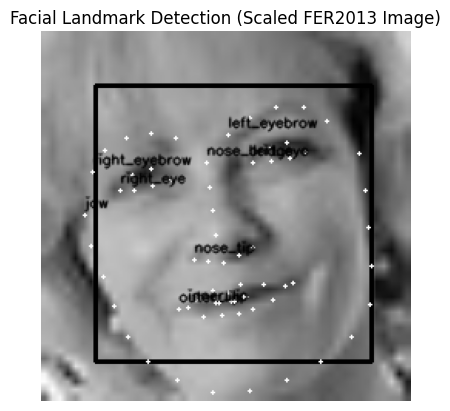

✅ Image saved to: processed_images\Training_143503_landmarks_20250606_004210.png


In [ ]:
# === 📦 1. Imports and Setup ===


import cv2
import dlib
import matplotlib.pyplot as plt

# Load the pre-trained face detector and 68-point shape predictor

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../models/shape_predictor_68_face_landmarks.dat")

# === 🖼️ 2. Load and Resize Image ===


# Load an initial low-resolution image from FER2013 dataset

img_path = "../data/fer2013/train/happy/Training_143503.jpg"
img = cv2.imread(img_path)

# Convert to greyscale (as required by the detector)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Scale the image to help model improve detection (scale factor = 5)

sf = 5
scaled_image = cv2.resize(gray, (gray.shape[1]*sf, gray.shape[0]*sf))

# === 🧠 3. Face Detection ===

faces = detector(scaled_image)

# Define facial landmark regions using dlib's 68-point index

FACIAL_LANDMARKS_INDEXES = {
    "jaw": (0, 17),
    "right_eyebrow": (17, 22),
    "left_eyebrow": (22, 27),
    "nose_bridge": (27, 31),
    "nose_tip": (31, 36),
    "right_eye": (36, 42),
    "left_eye": (42, 48),
    "outer_lip": (48, 60),
    "inner_lip": (60, 68)
}

# Draw face rectangle and landmarks if a face is found (helps user debug breakdowns)

for face in faces:
    # Draw rectangle
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(scaled_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Predict and draw landmarks
    landmarks = predictor(scaled_image, face)

    # Draw and label landmarks by region
    for region_name, (start, end) in FACIAL_LANDMARKS_INDEXES.items():
        for i in range(start, end):
            x, y = landmarks.part(i).x, landmarks.part(i).y
            cv2.circle(scaled_image, (x, y), 1, (255, 0, 0), -1)
    # Label each region once, near its first point
        label_x = landmarks.part(start).x
        label_y = landmarks.part(start).y - 5
        cv2.putText(
            scaled_image, region_name,
            (label_x, label_y),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.3, (0, 255, 255), 1, cv2.LINE_AA
        )

# === 🖥️ 4. Display the Output ===

# Matplotlib - for notebook accessiblity 

import cv2
import matplotlib.pyplot as plt

# Convert BGR to RGB

rgb_image = cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_image)
plt.title("Facial Landmark Detection (Scaled FER2013 Image)")
plt.axis('off')
plt.show()

# OpenCV2 - for quick viewing ability outside notebook

## cv2.imshow("Facial Landmark Detection", scaled_image)
## cv2.waitKey(0)
## cv2.destroyAllWindows()


# === 🔁 5. Automated Save Image Function ===


import os
import cv2
import numpy as np
from datetime import datetime

# Function definition

def save_processed_image(img_array, original_path, output_folder="processed_images"):
    
    # Check for output folder existence

    output_dir = "processed_images"
    os.makedirs(output_dir, exist_ok=True)

    # Image conversion to uint8 (0-255) format as plt.imshow displays floats (0-1)

    if img_array.dtype != np.uint8:
        img_to_save = (img_array * 255).astype(np.uint8)
    else:
        img_to_save = img_array

    # Create unique filename using original name + a timestamp

    original_filename = os.path.basename(original_path)
    name_without_ext, _ = os.path.splitext(original_filename)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{name_without_ext}_landmarks_{timestamp}.png"
    output_path = os.path.join(output_folder, filename)

    # Use OpenCV to save image

    success = cv2.imwrite(output_path, img_to_save)

    # Print whether task was successful or not (allows for debug)

    if success:
          print(f"✅ Image saved to: {output_path}")
          return output_path
    else:
        print("❌ Failed to save image.")
        return None

# Call function

saved_path = save_processed_image(rgb_image, img_path)